# K-Nearest Neighbor

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Dataset loading
import sys
sys.path.append("..")
from Functions.UNSW_DF import *
x_train, x_test, y_train, y_test = DF_XY()

In [3]:
error = []
K_value = []
accuracy_score = []
precision_score = []
F1_score = []
recall_score = []

# Calculating error for K values between 1 and 200 and appending scores to lists
for i in range(1, 201):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    
    # Appending values to list
    error.append(np.mean(pred_i != y_test))
    K_value.append(i)
    accuracy_score.append(metrics.accuracy_score(y_test, pred_i))
    precision_score.append(metrics.precision_score(y_test, pred_i))
    F1_score.append(metrics.f1_score(y_test, pred_i))
    recall_score.append(metrics.recall_score(y_test, pred_i))
    

In [4]:
# Creating a dataframe and saving to file
# dictionary of lists 
dict = {
        'K': K_value, 
        'accuracy': accuracy_score, 
        'precision': precision_score,
        'F1': F1_score,
        'recall': recall_score,
        'error': error
        }

df = pd.DataFrame(dict, index=K_value)
df.set_index("K", inplace = True)
df
# EXPORT AS CSV when done.
df.to_csv('K_SCORES(1-200).csv')

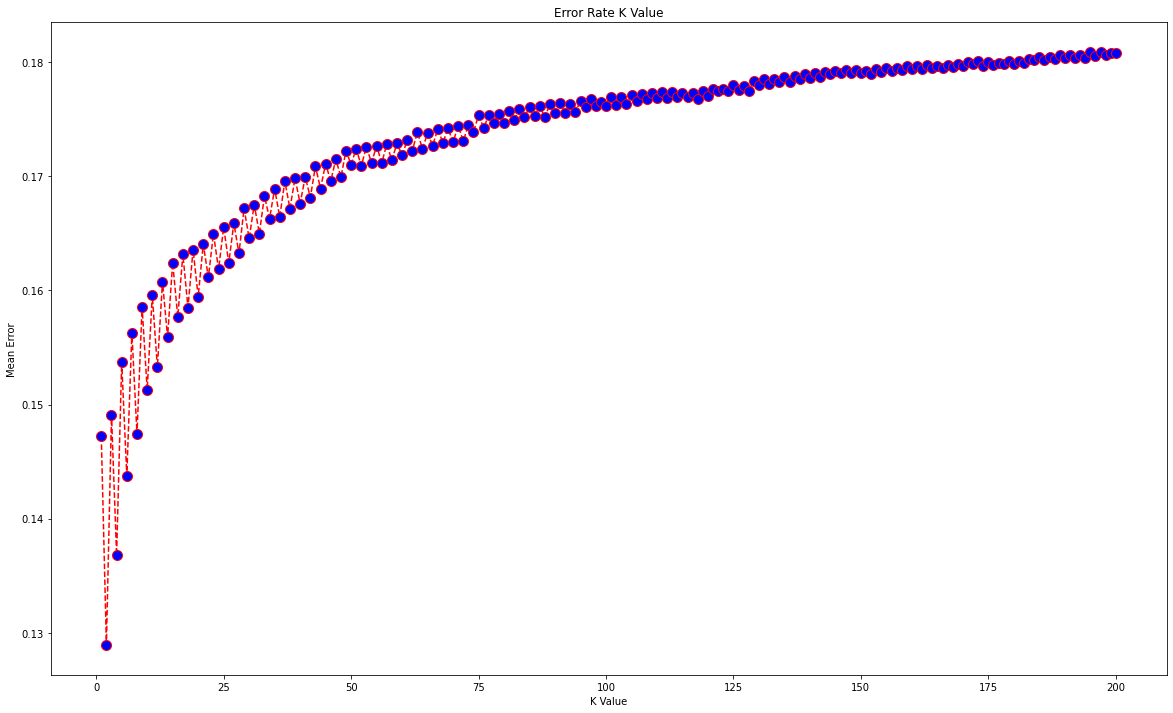

In [26]:
plt.figure(figsize=(20, 12))
plt.plot(range(1, 201), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.savefig('KNN(1-200)_v3.png', dpi=300, transparent=True)
plt.show()

In [20]:
new_dataframe = pd.read_csv("K_SCORES(1-200).csv")
new_dataframe

,K,accuracy,precision,F1,recall,error
0,1,0.852791,0.814889,0.876412,0.947984,0.147209
1,2,0.871083,0.857034,0.887027,0.919196,0.128917
2,3,0.850896,0.805825,0.876469,0.960690,0.149104
3,4,0.863188,0.831969,0.883449,0.941719,0.136812
4,5,0.846281,0.797791,0.873688,0.965543,0.153719
...,...,...,...,...,...,...
195,196,0.819451,0.756331,0.858106,0.991529,0.180549
196,197,0.819110,0.755915,0.857895,0.991684,0.180890
197,198,0.819353,0.756307,0.858016,0.991331,0.180647
198,199,0.819183,0.756000,0.857942,0.991662,0.180817


In [21]:
new_dataframe.set_index("K", inplace=True)
new_dataframe